<a href="https://colab.research.google.com/github/itsyoru/all_nba-prediction-model/blob/main/AllNBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
per_game = pd.read_csv('Player Per Game.csv')

In [ ]:
end_of_season = pd.read_csv('End of Season Teams.csv')

In [ ]:
end_of_season.columns

Index(['season', 'lg', 'type', 'number_tm', 'player', 'position', 'seas_id',
       'player_id', 'birth_year', 'tm', 'age'],
      dtype='object')

In [ ]:
end_of_season.head()

,season,lg,type,number_tm,player,position,seas_id,player_id,birth_year,tm,age
0,2024,NBA,All-Defense,1st,Rudy Gobert,NaN,31747,4199,NaN,MIN,31
1,2024,NBA,All-Defense,1st,Victor Wembanyama,NaN,31850,5209,NaN,SAS,20
2,2024,NBA,All-Defense,1st,Bam Adebayo,NaN,31178,4472,NaN,MIA,26
3,2024,NBA,All-Defense,1st,Herbert Jones,NaN,31385,4939,NaN,NOP,25
4,2024,NBA,All-Defense,1st,Anthony Davis,NaN,31170,4066,NaN,LAL,30


In [ ]:
merged_df = pd.merge(per_game, end_of_season[['player', 'type']], on='player', how='left')

merged_df['is_all_nba'] = merged_df['type'].apply(lambda x: 1 if x == 'All-NBA' else 0)


In [ ]:
merged_df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'type', 'is_all_nba'],
      dtype='object')

In [ ]:
merged_df = merged_df.drop(['seas_id', 'birth_year', 'age', 'experience', 'lg'
, 'g', 'gs' ], axis=1)

print(merged_df)


       season  player_id          player  pos   tm  mp_per_game  fg_per_game  \
0        2025     5025.0      A.J. Green   SG  MIL         22.7          2.6   
1        2025     5026.0     A.J. Lawson   SG  TOR          3.2          0.8   
2        2025     5210.0      AJ Johnson   SG  TOT          7.0          1.1   
3        2025     5210.0      AJ Johnson   SG  MIL          6.3          1.1   
4        2025     5210.0      AJ Johnson   SG  WAS          8.7          1.0   
...       ...        ...             ...  ...  ...          ...          ...   
54702    1947      157.0     Walt Miller    F  PIT          NaN          0.6   
54703    1947      158.0   Warren Fenley    F  BOS          NaN          0.9   
54704    1947      159.0   Wilbert Kautz  G-F  CHS          NaN          2.1   
54705    1947      160.0  Woody Grimshaw    G  PRO          NaN          1.0   
54706    1947      161.0     Wyndol Gray  G-F  BOS          NaN          2.5   

       fga_per_game  fg_percent  x3p_pe

In [ ]:
merged_df = merged_df.dropna()

In [ ]:
merged_df.tail()

,season,player_id,player,pos,tm,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,...,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,type,is_all_nba
46022,1973,1008.0,Louie Dampier,PG,KEN,38.0,6.4,14.3,0.451,0.7,...,2.0,2.7,6.5,1.2,0.1,2.4,2.7,16.8,All-ABA,0
46023,1973,1008.0,Louie Dampier,PG,KEN,38.0,6.4,14.3,0.451,0.7,...,2.0,2.7,6.5,1.2,0.1,2.4,2.7,16.8,All-Rookie,0
46053,1973,1388.0,Mike Gale,PG,KEN,22.9,2.7,5.7,0.471,0.0,...,2.0,3.0,3.1,1.6,0.5,1.3,2.6,6.6,All-Defense,0
46054,1973,1388.0,Mike Gale,PG,KEN,22.9,2.7,5.7,0.471,0.0,...,2.0,3.0,3.1,1.6,0.5,1.3,2.6,6.6,All-Defense,0
46242,1973,1334.0,Wendell Ladner,SF,KEN,17.8,2.9,8.6,0.343,0.2,...,3.4,4.9,1.9,1.9,0.1,1.4,3.6,7.3,All-Rookie,0


In [ ]:
train_data = merged_df[merged_df['season'].between(2015, 2020)]

test_data = merged_df[merged_df['season'] >= 2021]

In [ ]:
features = [
    'fg_percent', 'x3p_percent','pts_per_game', 'ast_per_game',
    'trb_per_game','stl_per_game', 'blk_per_game', 'fga_per_game',
    'tov_per_game','fta_per_game', 'e_fg_percent', 'x3pa_per_game'
]

X_train = train_data[features]
y_train = train_data['is_all_nba']

X_test = test_data[features]
y_test = test_data['is_all_nba']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1316
           1       0.68      0.67      0.68      1067

    accuracy                           0.71      2383
   macro avg       0.71      0.71      0.71      2383
weighted avg       0.71      0.71      0.71      2383



In [ ]:
importances = model.feature_importances_

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

fg_percent: 0.0590
x3p_percent: 0.0562
pts_per_game: 0.1332
ast_per_game: 0.0810
trb_per_game: 0.0771
stl_per_game: 0.0627
blk_per_game: 0.0513
fga_per_game: 0.1159
tov_per_game: 0.0908
fta_per_game: 0.1390
e_fg_percent: 0.0621
x3pa_per_game: 0.0716


In [ ]:
from sklearn.model_selection import train_test_split

eatures = [
    'fg_percent', 'x3p_percent','pts_per_game', 'ast_per_game',
    'trb_per_game','stl_per_game', 'blk_per_game', 'fga_per_game',
    'tov_per_game','fta_per_game', 'e_fg_percent', 'x3pa_per_game'
]

X = merged_df[features]
y = merged_df['is_all_nba']

X_full_train, X_test, y_full_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_full_train, y_full_train, test_size=0.2, random_state=42, stratify=y_full_train)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


485/485 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5918 - loss: 0.7254 - val_accuracy: 0.6716 - val_loss: 0.6059
Epoch 2/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6359 - loss: 0.6579 - val_accuracy: 0.6788 - val_loss: 0.6018
Epoch 3/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6598 - loss: 0.6307 - val_accuracy: 0.6850 - val_loss: 0.5997
Epoch 4/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6521 - loss: 0.6316 - val_accuracy: 0.6845 - val_loss: 0.5990
Epoch 5/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6654 - loss: 0.6186 - val_accuracy: 0.6837 - val_loss: 0.5990
Epoch 6/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6654 - loss: 0.6210 - val_accuracy: 0.6834 - val_loss: 0.5970
Epoch 7/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6691 - loss: 0.6204 - val_accuracy: 0.6814 - val_loss: 0.5988
Epoch 8/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6663 - loss: 0.6149 - val_accuracy: 0.6842

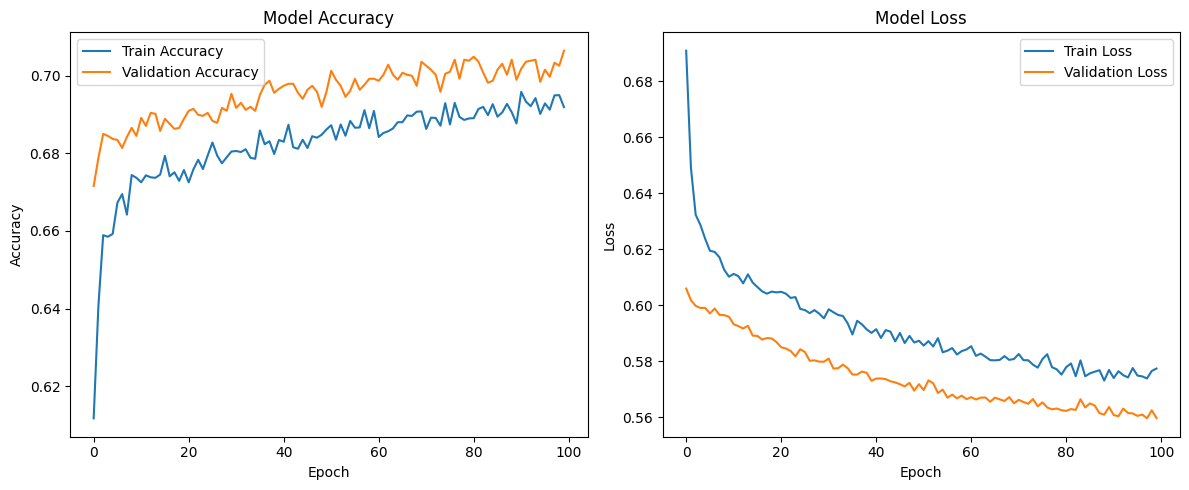

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(len(features),)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"✅ Final Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5522 - loss: 0.7692 - val_accuracy: 0.6307 - val_loss: 0.6474
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6483 - loss: 0.6490 - val_accuracy: 0.6618 - val_loss: 0.6221
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6491 - loss: 0.6482 - val_accuracy: 0.6735 - val_loss: 0.6005
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6542 - loss: 0.6410 - val_accuracy: 0.6911 - val_loss: 0.5896
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6462 - loss: 0.6448 - val_accuracy: 0.6890 - val_loss: 0.5929
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6722 - loss: 0.6120 - val_accuracy: 0.6903 - val_loss: 0.5861
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6706 - loss: 0.6227 - val_accuracy: 0.6874 - val_loss: 0.5923
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6796 - loss: 0.5927 - val_accuracy: 0.68

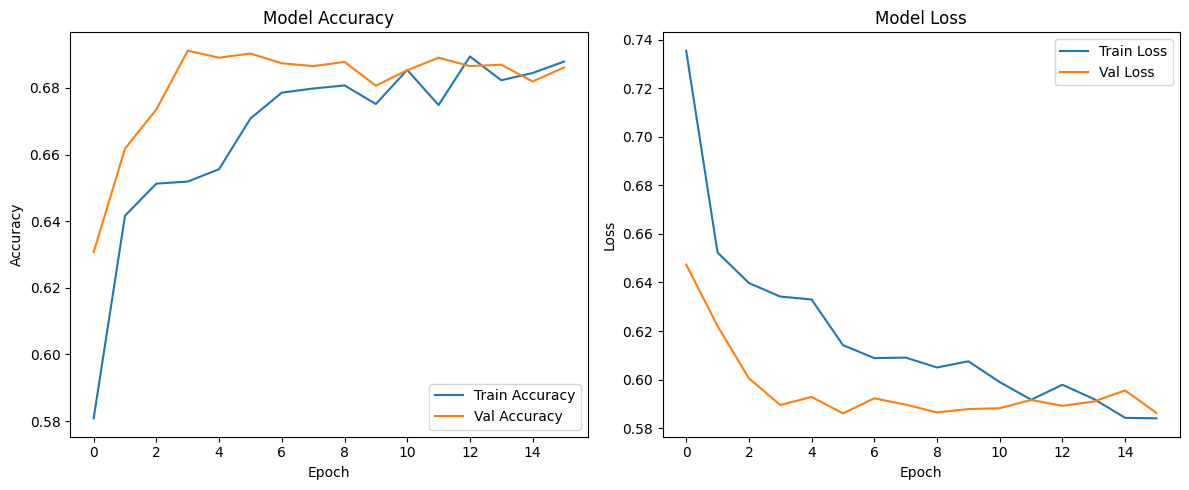

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(len(features),)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

class_weight = None

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weight,
    verbose=1
)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


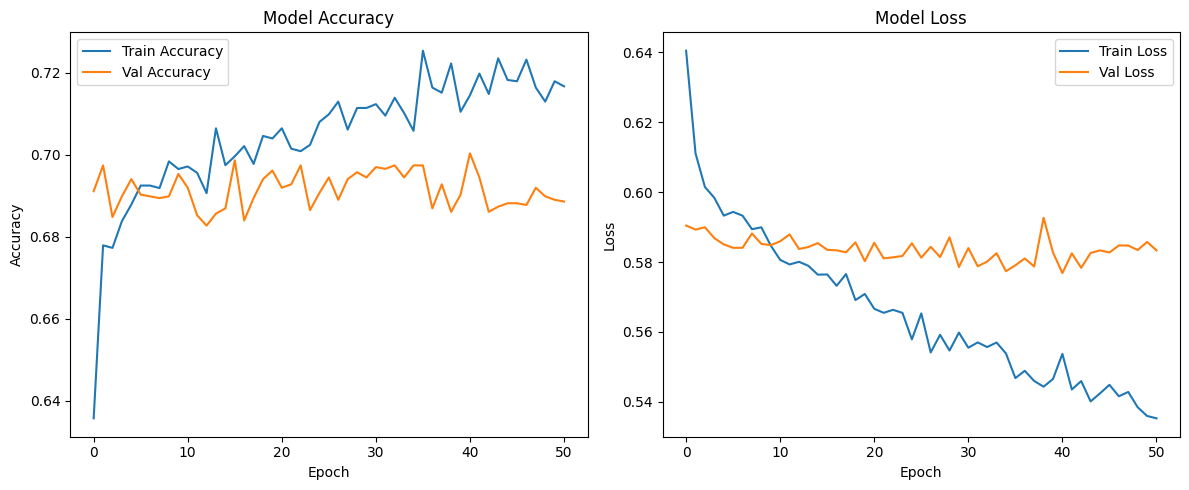

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import shap

background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

explainer = shap.KernelExplainer(lambda x: model.predict(x).flatten(), background)

sample_data = X_test_scaled[:10]
shap_values = explainer.shap_values(sample_data)

shap.summary_plot(shap_values, sample_data, feature_names=features)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
